In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title('Ground truth', fontsize=18)
    plt.scatter(x[np.where(y == 0)[0], 0], x[np.where(y == 0)[0], 1])
    plt.scatter(x[np.where(y == 1)[0], 0], x[np.where(y == 1)[0], 1])
    
    plt.subplot(1, 2, 2)
    plt.title('Predict result', fontsize=18)
    plt.scatter(x[np.where(pred_y == 0)[0], 0], x[np.where(pred_y == 0)[0], 1])
    plt.scatter(x[np.where(pred_y == 1)[0], 0], x[np.where(pred_y == 1)[0], 1])
    plt.show()

In [3]:
def generate_linear(n=1000):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

In [4]:
def generate_XOR_easy():
    inputs = []
    labels = []
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        if 0.1*i == 0.5:
            continue
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21, 1)

In [5]:
x, y = generate_XOR_easy()

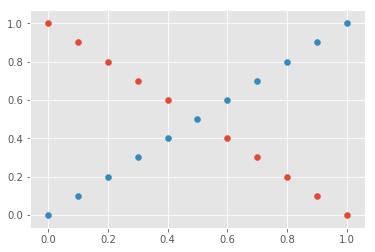

In [6]:
plt.scatter(x[np.where(y==1)[0], 0], x[np.where(y==1)[0], 1])
plt.scatter(x[np.where(y==0)[0], 0], x[np.where(y==0)[0], 1])
plt.show()

In [7]:
class Net():
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, lr):
        self.inodes = input_size
        self.h1nodes = hidden1_size
        self.h2nodes = hidden2_size
        self.onodes = output_size
        self.wih = np.random.randn(self.inodes, self.h1nodes)
        self.whh = np.random.randn(self.h1nodes, self.h2nodes)
        self.who = np.random.randn(self.h2nodes, self.onodes)
        self.lr = lr
        self.sigmoid = lambda x: 1/(1+np.exp(-x))
        
    def train(self, inputs, targets):
        for epoch in range(1, 1001):
            hidden_inputs = np.dot(inputs, self.wih)
            hidden_outputs = self.sigmoid(hidden_inputs)

            hidden2_inputs = np.dot(hidden_outputs, self.whh)
            hidden2_outputs = self.sigmoid(hidden2_inputs)
            
            final_inputs = np.dot(hidden2_outputs, self.who)
            final_outputs = self.sigmoid(final_inputs)

            error = (targets - final_outputs) ** 2
            derr = -2 * (targets - final_outputs)
            hidden2_error = np.dot(derr, self.who.T)
            hidden_error = np.dot(hidden2_error, self.whh.T)
            
            self.who -= self.lr * np.dot(hidden2_outputs.T, (derr * final_outputs * (1.0 - final_outputs)))
            self.whh -= self.lr * np.dot(hidden_outputs.T, (hidden2_error * hidden2_outputs * (1.0 - hidden2_outputs)))
            self.wih -= self.lr * np.dot(inputs.T, (hidden_error * hidden_outputs * (1.0 - hidden_outputs)))

            if epoch % 100 == 0:
                acc = len(np.where(final_outputs.round(0) == targets)[0]) / len(final_outputs)
                print('epoch {:4d} loss : {:13s} Acc : {:3.2f}'.format(epoch, str(np.sum(error, axis=0)), acc))
        
    def query(self, inputs):
        hidden_inputs = np.dot(inputs, self.wih)
        hidden_outputs = self.sigmoid(hidden_inputs)
        
        hidden2_inputs = np.dot(hidden_outputs, self.whh)
        hidden2_outputs = self.sigmoid(hidden2_inputs)
        
        final_inputs = np.dot(hidden2_outputs, self.who)
        final_outputs = self.sigmoid(final_inputs)
        return final_outputs

In [8]:
net = Net(2, 4, 4, 1, 0.1)

In [9]:
net.train(x, y)

epoch  100 loss : [5.08419301]  Acc : 0.71
epoch  200 loss : [4.29089734]  Acc : 0.71
epoch  300 loss : [3.65885376]  Acc : 0.76
epoch  400 loss : [0.4734548]   Acc : 1.00
epoch  500 loss : [0.05320783]  Acc : 1.00
epoch  600 loss : [0.01841646]  Acc : 1.00
epoch  700 loss : [0.00970679]  Acc : 1.00
epoch  800 loss : [0.00622169]  Acc : 1.00
epoch  900 loss : [0.00444833]  Acc : 1.00
epoch 1000 loss : [0.0034068]   Acc : 1.00


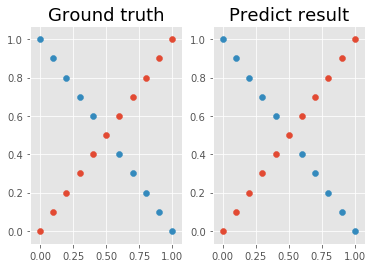

In [10]:
show_result(x, y, net.query(x).round(0))

In [11]:
print('Groud truth vs Prediction')
pred = net.query(x)
for i in range(21):
    print(y[i], pred[i])

Groud truth vs Prediction
[0] [0.03027025]
[1] [0.99385731]
[0] [0.01728851]
[1] [0.99386918]
[0] [0.01244453]
[1] [0.99387934]
[0] [0.01045102]
[1] [0.99379519]
[0] [0.00954018]
[1] [0.97582134]
[0] [0.00908997]
[0] [0.00885544]
[1] [0.97886803]
[0] [0.00872909]
[1] [0.99313598]
[0] [0.00865951]
[1] [0.99319672]
[0] [0.00862063]
[1] [0.99321073]
[0] [0.00859867]
[1] [0.9932242]


In [12]:
x, y = generate_linear(100)

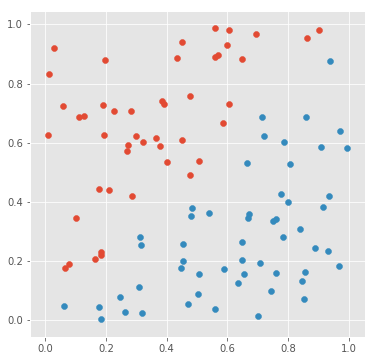

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(x[np.where(y==1)[0], 0], x[np.where(y==1)[0], 1])
plt.scatter(x[np.where(y==0)[0], 0], x[np.where(y==0)[0], 1])
plt.show()

In [14]:
net = Net(2, 3, 3, 1, 0.01)

In [15]:
net.train(x, y)

epoch  100 loss : [5.00393229]  Acc : 0.99
epoch  200 loss : [1.14552815]  Acc : 1.00
epoch  300 loss : [0.61217366]  Acc : 1.00
epoch  400 loss : [0.39562907]  Acc : 1.00
epoch  500 loss : [0.27880778]  Acc : 1.00
epoch  600 loss : [0.20730894]  Acc : 1.00
epoch  700 loss : [0.16016504]  Acc : 1.00
epoch  800 loss : [0.12743941]  Acc : 1.00
epoch  900 loss : [0.10382415]  Acc : 1.00
epoch 1000 loss : [0.08624963]  Acc : 1.00


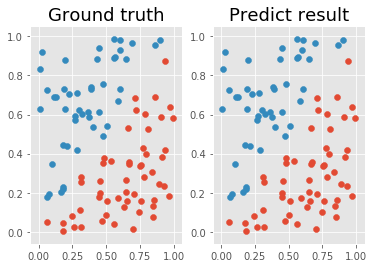

In [16]:
show_result(x, y, net.query(x).round(0))

In [17]:
print('Groud truth vs Prediction')
pred = net.query(x)
for i in range(21):
    print(y[i], pred[i])

Groud truth vs Prediction
[0] [0.00909511]
[0] [0.01248209]
[0] [0.00953609]
[0] [0.00967805]
[1] [0.98509335]
[0] [0.00908472]
[0] [0.01005596]
[1] [0.98441421]
[1] [0.98513615]
[1] [0.98497627]
[1] [0.9849444]
[0] [0.00909763]
[1] [0.98510502]
[0] [0.00944754]
[1] [0.98088039]
[0] [0.0091335]
[0] [0.00912901]
[1] [0.9849574]
[1] [0.98513686]
[1] [0.98512933]
[1] [0.98507896]
